# Pyber

This is an analysis of the ride sharing success using data from competitors as guidance for new opportunities for market differentiation.  This analysis will use 4 key variables (Fare, Number of Rides, Number of Drivers, City Type).

* The study found that people in the urban areas utilize the use of ride sharing the most (67.5%) and the least in rural areas (6.6%)
* The concentration of drivers in the rural areas are the lowest (1.0%) which might account to why ridership in those areas are very low (5.2%).
* Despite that the average fare in the urban areas are lower than those in the suburban areas, the number of riders that use ride sharing in the urban areas account for the high total fares (62%).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
# define data inputs
city_data = "Resources/city_data.csv"
ride_data = "Resources/ride_data.csv"

# define array of colors to use
colors = ['gold', 'lightskyblue', 'lightcoral']
citytype = ['Rural','Suburban','Urban']

In [3]:
# open city data and replace all NaN, if any
city_orig_pd = pd.read_csv(city_data)
city_orig_pd.fillna(0, inplace=True)
city_orig_pd[city_orig_pd['city'] == "Port James"]

,city,driver_count,type
84,Port James,15,Suburban
100,Port James,3,Suburban


In [4]:
# open ride data and replace all NaN, if any
ride_orig_pd = pd.read_csv(ride_data)
ride_orig_pd.fillna(0, inplace=True)
ride_orig_pd.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
merged_pd = city_orig_pd.merge(ride_orig_pd, on="city", how="left")
merged_renamed_final = merged_pd[['city','date','fare','ride_id','driver_count','type']]

merged_renamed_final.head()

,city,date,fare,ride_id,driver_count,type
0,Kelseyland,2016-08-19 04:27:52,5.51,6246006544795,63,Urban
1,Kelseyland,2016-04-17 06:59:50,5.54,7466473222333,63,Urban
2,Kelseyland,2016-05-04 15:06:07,30.54,2140501382736,63,Urban
3,Kelseyland,2016-01-25 20:44:56,12.08,1896987891309,63,Urban
4,Kelseyland,2016-08-09 18:19:47,17.91,8784212854829,63,Urban


In [6]:
# ride_info_df = merged
ride_types_group = merged_pd.groupby(['type','city'])
driver_count = ride_types_group['driver_count'].max()
city_types =  ride_types_group['type'].max()
averagefares = ride_types_group['fare'].mean()
ride_count = ride_types_group['ride_id'].count()

city_df = pd.DataFrame({
    "type": city_types,
    "Driver Count" : driver_count,
    "Average Fare" : averagefares,
    "Number of Rides" : ride_count})

city_df.head()

Average Fare  Driver Count  Number of Rides   type
type  city                                                              
Rural East Leslie        33.660909             9               11  Rural
      East Stephen       39.053000             6               10  Rural
      East Troybury      33.244286             3                7  Rural
      Erikport           30.043750             3                8  Rural
      Hernandezshire     32.002222            10                9  Rural

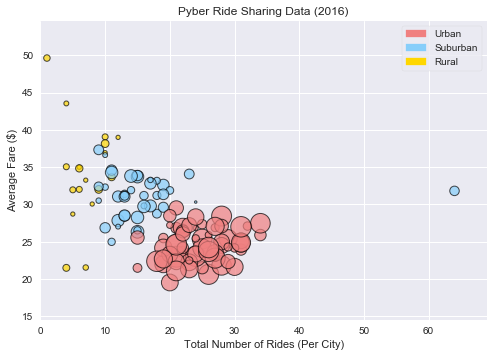

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(city_df['Number of Rides'],city_df['Average Fare'], s=city_df['Driver Count']*6, marker="o",facecolor=city_df.type.map({citytype[2]: colors[2], citytype[0]: colors[0], citytype[1]: colors[1]}), alpha=0.7, edgecolors="black", linewidth=1) 
handles, labels = ax.get_legend_handles_labels()
u_patch = mpatches.Patch(color=colors[2], label=citytype[2])
s_patch = mpatches.Patch(color=colors[1], label=citytype[1])
r_patch = mpatches.Patch(color=colors[0], label=citytype[0])
plt.legend(handles=[u_patch, s_patch, r_patch], frameon=True, loc="upper right")


ax.set_title('Pyber Ride Sharing Data (2016)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.set_xlim(0, city_df['Number of Rides'].max()+5)
ax.set_ylim(city_df['Average Fare'].min()-5, (city_df['Average Fare'].max() + 5))
plt.show()

## Total Fares by City Type

In [8]:
# find total fare by type
fares_df = merged_pd.groupby(['type']).aggregate({'fare':'sum'})
fares_df

,fare
type,
Rural,4255.09
Suburban,20335.69
Urban,40078.34


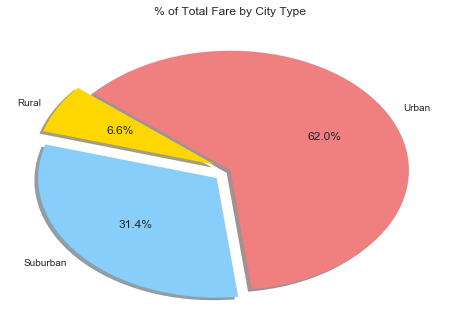

In [9]:
# Data to plot
labels = fares_df.index.tolist()
plt.figure()
explode = (0.1, 0.1, 0)  # explode 1st slice
 
# # Plot
plt.pie(fares_df['fare'], explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)


plt.title("% of Total Fare by City Type") 
plt.show()

## Total Rides by City Type

In [10]:
rides_df = merged_pd.groupby(['type']).aggregate({'ride_id':'count'})
rides_df

,ride_id
type,
Rural,125
Suburban,657
Urban,1625


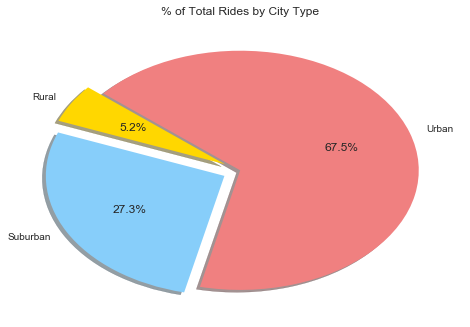

In [11]:
# Data to plot
labels = rides_df.index.tolist()
explode = (0.1, 0.1, 0)  # explode 1st slice
 
# # Plot
plt.pie(rides_df['ride_id'], explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title("% of Total Rides by City Type") 
plt.show()

## Total Drivers by City Type

In [12]:
drivers_df = merged_pd.groupby(['type']).aggregate({'driver_count':'sum'})
drivers_df

,driver_count
type,
Rural,727
Suburban,9730
Urban,64501


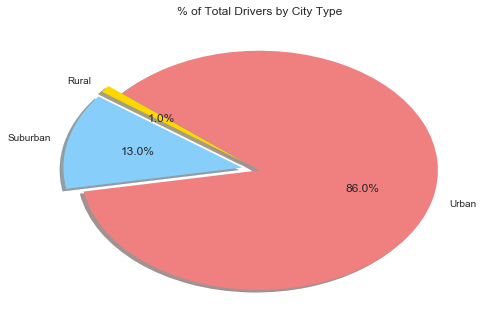

In [13]:
# Data to plot
labels = drivers_df.index.tolist()
explode = (0.1, 0.1, 0) 
 

# # Plot
plt.pie(drivers_df['driver_count'], explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)


plt.title("% of Total Drivers by City Type") 
plt.show()